### Problem 1: Ops Exercises

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns

In [2]:
from minibatch import iterate_minibatches

In [3]:
%load_ext autoreload
%autoreload 2

In [ ]:
###############################################################################
# 1a: Create two random 0-d tensors x and y of any distribution.
# Create a TensorFlow object that returns x + y if x > y, and x - y otherwise.
# Hint: look up tf.cond()
# I do the first problem for you
###############################################################################
x = tf.random_uniform([])  # Empty array as shape creates a scalar.
y = tf.random_uniform([])
out = tf.cond(tf.less(x, y), lambda: tf.add(x, y), lambda: tf.subtract(x, y))

In [ ]:
###############################################################################
# 1b: Create two 0-d tensors x and y randomly selected from -1 and 1.
# Return x + y if x < y, x - y if x > y, 0 otherwise.
# Hint: Look up tf.case().
###############################################################################
x = tf.random_uniform([],minval=-1,maxval=1)
y = tf.random_uniform([],minval=-1,maxval=1)
out = tf.case([(tf.less(x,y),lambda: tf.add(x,y)),(tf.less(y,x),lambda: tf.subtract(x,y))],default=\
              lambda: tf.constant(0,dtype=tf.float32))

In [ ]:
###############################################################################
# 1c: Create the tensor x of the value [[0, -2, -1], [0, 1, 2]] 
# and y as a tensor of zeros with the same shape as x.
# Return a boolean tensor that yields Trues if x equals y element-wise.
# Hint: Look up tf.equal().
###############################################################################
x = tf.constant([[0,-2,-1],[0,1,2]],name="x")
y = tf.ones_like(x)
out = tf.equal(x,y)

In [ ]:
###############################################################################
# 1d: Create the tensor x of value 
# [29.05088806,  27.61298943,  31.19073486,  29.35532951,
#  30.97266006,  26.67541885,  38.08450317,  20.74983215,
#  34.94445419,  34.45999146,  29.06485367,  36.01657104,
#  27.88236427,  20.56035233,  30.20379066,  29.51215172,
#  33.71149445,  28.59134293,  36.05556488,  28.66994858].
# Get the indices of elements in x whose values are greater than 30.
# Hint: Use tf.where().
# Then extract elements whose values are greater than 30.
# Hint: Use tf.gather().
###############################################################################
x = tf.constant([29.05088806,  27.61298943,  31.19073486,  29.35532951,
                30.97266006,  26.67541885,  38.08450317,  20.74983215,
                34.94445419,  34.45999146,  29.06485367,  36.01657104,
                27.88236427,  20.56035233,  30.20379066,  29.51215172,
                33.71149445,  28.59134293,  36.05556488,  28.66994858],name="x")
out1 = tf.where(x > 30)
out2 = tf.gather(x,out1)

In [ ]:
## Sanity Check
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print out2.eval().shape

In [ ]:
###############################################################################
# 1e: Create a diagnoal 2-d tensor of size 6 x 6 with the diagonal values of 1,
# 2, ..., 6
# Hint: Use tf.range() and tf.diag().
###############################################################################
diagonal = tf.range(start=1,limit=7,delta=1)
out = tf.diag(diagonal)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print out.eval()

In [ ]:
###############################################################################
# 1f: Create a random 2-d tensor of size 10 x 10 from any distribution.
# Calculate its determinant.
# Hint: Look at tf.matrix_determinant().
###############################################################################
matrix = tf.random_normal(shape=[10,10],stddev=1.0,mean=0)
out = tf.matrix_determinant(matrix)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print out.eval()

In [ ]:
###############################################################################
# 1g: Create tensor x with value [5, 2, 3, 5, 10, 6, 2, 3, 4, 2, 1, 1, 0, 9].
# Return the unique elements in x
# Hint: use tf.unique(). Keep in mind that tf.unique() returns a tuple.
###############################################################################
vector = tf.Variable(tf.constant([5, 2, 3, 5, 10, 6, 2, 3, 4, 2, 1, 1, 0, 9]),name="vector")
out = tf.unique(vector)
with tf.Session() as sess:
    sess.run(vector.initializer)
    print out[0].eval()

In [ ]:
##############################################################################
# 1h: Create two tensors x and y of shape 300 from any normal distribution,
# as long as they are from the same distribution.
# Use tf.less() and tf.select() to return:
# - The mean squared error of (x - y) if the average of all elements in (x - y)
#   is negative, or
# - The sum of absolute value of all elements in the tensor (x - y) otherwise.
# Hint: see the Huber loss function in the lecture slides 3.
###############################################################################
x = tf.Variable(tf.random_normal(shape=[300,300]),name="x")
y = tf.Variable(tf.random_normal(shape=[300,300]),name="y")
condition = tf.less(tf.reduce_mean(x - y),0)
f1 = tf.square(tf.subtract(x,y))
f2 = tf.reduce_sum(tf.abs(x - y))
out = tf.cond(condition,lambda:f1,lambda:f2)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print out.eval()

### Problem 2: Logistic Regression

In [72]:
data = pd.read_csv('../../Dataset/MNIST/train.csv')
print data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


In [73]:
data.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
label_ = data.pop('label')
label = pd.get_dummies(label_)
print label.shape

(42000, 10)


1


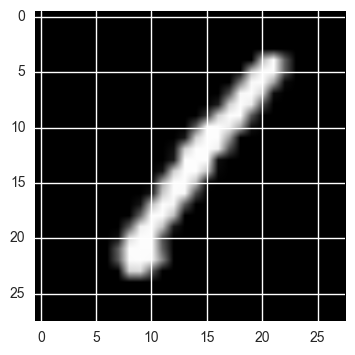

In [7]:
plt.imshow(data.iloc[0,:].reshape(28,28),cmap='gray')
print np.argmax(label[0])

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,label,test_size=0.3,random_state=7)
X_train,X_test,y_train,y_test = X_train.values,X_test.values,y_train.values,y_test.values
print X_train.shape,y_train.shape
print X_test.shape,y_test.shape

(29400, 784) (29400, 10)
(12600, 784) (12600, 10)


### Fully Connected Neural Network Using Tensorflow

In [45]:
tf.reset_default_graph()

In [46]:
batch_size = 100
num_samples,n_features = X_train.shape
num_samples_cv = X_test.shape[0]
num_classes, num_hidden = 10,512
n_epochs = 100

In [47]:
X = tf.placeholder(tf.float32,shape=[None,n_features],name='X')
y = tf.placeholder(tf.float32,shape=[None,num_classes],name='y')

In [48]:
W1 = tf.Variable(tf.random_normal(shape=[n_features,num_hidden]),name='W1')
b1 = tf.Variable(tf.zeros([1,num_hidden]),name='b1')
W2 = tf.Variable(tf.random_normal(shape=[num_hidden,num_classes]),name='W2')
b2 = tf.Variable(tf.zeros([1,num_classes]),name='b2')
print W1,b1
print W2,b2

Tensor("W1/read:0", shape=(784, 512), dtype=float32) Tensor("b1/read:0", shape=(1, 512), dtype=float32)
Tensor("W2/read:0", shape=(512, 10), dtype=float32) Tensor("b2/read:0", shape=(1, 10), dtype=float32)


In [49]:
## First Activation
z1 = tf.matmul(X,W1) + b1
a1 = tf.nn.relu(z1)
## Second Activation
logits = tf.matmul(a1,W2) + b2
#ypred = tf.sigmoid(logits)
## Getting the accuracy
correct_preds = tf.equal(tf.argmax(logits,1),tf.argmax(y,1))
acc = tf.reduce_mean(tf.cast(correct_preds,tf.float32))

In [50]:
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y)
loss = tf.reduce_mean(entropy)

In [51]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [53]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    prev_cost = 0.0
    Writer = tf.summary.FileWriter('./graphs',sess.graph)
    for epoch in range(n_epochs):
        cost,accuracy_train,accuracy_cv = 0.0,[],[]
        ## Training Epochs
        for i in range(num_samples/batch_size):
            cur_batch,next_batch = i*batch_size,(i+1)*batch_size
            x_batch,y_batch = X_train[cur_batch:next_batch,:],y_train[cur_batch:next_batch,:]
            _,l,acc_train = sess.run([optimizer,loss,acc],feed_dict={X:x_batch,y:y_batch})
            accuracy_train.append(acc_train)
            cost += l
        ## Cross validation epochs
        for i in range(num_samples_cv/batch_size):
            cur_batch,next_batch = i*batch_size,(i+1)*batch_size
            x_batch,y_batch = X_test[cur_batch:next_batch,:],y_test[cur_batch:next_batch,:]
            acc_cv = sess.run(acc,feed_dict={X:x_batch,y:y_batch})
            accuracy_cv.append(acc_cv)
        print 'Epoch: {}\tTraining Loss: {}\t Trainig Acc: {}\tCross Validation Acc: {}'.\
        format(epoch+1,cost,np.mean(accuracy_train),np.mean(accuracy_cv))
        if abs(cost - prev_cost) <= 1e-5:
            print 'Reached Minima....'
            break
        prev_cost = cost

Epoch: 1	Training Loss: 920149.325485	 Trainig Acc: 0.861258506775	Cross Validation Acc: 0.909444391727
Epoch: 2	Training Loss: 119870.398826	 Trainig Acc: 0.932993173599	Cross Validation Acc: 0.92158728838
Epoch: 3	Training Loss: 62767.2834234	 Trainig Acc: 0.952482998371	Cross Validation Acc: 0.929603099823
Epoch: 4	Training Loss: 36762.6611585	 Trainig Acc: 0.965578258038	Cross Validation Acc: 0.932142853737
Epoch: 5	Training Loss: 23100.5645252	 Trainig Acc: 0.973401427269	Cross Validation Acc: 0.932539701462
Epoch: 6	Training Loss: 13855.3783901	 Trainig Acc: 0.979659855366	Cross Validation Acc: 0.932936429977
Epoch: 7	Training Loss: 9387.04428804	 Trainig Acc: 0.983605444431	Cross Validation Acc: 0.933809459209
Epoch: 8	Training Loss: 6358.75797432	 Trainig Acc: 0.987108945847	Cross Validation Acc: 0.934444367886
Epoch: 9	Training Loss: 3940.54669224	 Trainig Acc: 0.990170001984	Cross Validation Acc: 0.936428487301
Epoch: 10	Training Loss: 2885.47919615	 Trainig Acc: 0.9924489855

### Convolutional Neural Network Using Tensorflow

In [121]:
from tensorflow.contrib import learn
from tensorflow.contrib.learn.python.learn.estimators import model_fn as model_fn_lib
from tensorflow.contrib.learn.python import SKCompat

In [122]:
tf.reset_default_graph()
tf.logging.set_verbosity(tf.logging.INFO)

In [135]:
data = pd.read_csv('../../Dataset/MNIST/train.csv')
X_train,X_test,y_train,y_test = train_test_split(data.iloc[:,1:],data.iloc[:,0],test_size=0.3,random_state=7)
X_train,y_train = np.asarray(X_train),np.asarray(y_train,np.int32)
X_test,y_test = np.asarray(X_test),np.asarray(y_test,np.int32)
print X_train.shape,y_train.shape
print X_test.shape,y_test.shape

(29400, 784) (29400,)
(12600, 784) (12600,)


In [146]:
print X_train.dtype,y_train.dtype
print X_test.dtype,y_test.dtype

int64 int32
int64 int32


### Building the CNN MNIST Classifier
Let's build a model to classify the images in the MNIST dataset using the following CNN architecture:

1. Convolutional Layer #1: Applies 32 5x5 filters (extracting 5x5-pixel subregions), with ReLU activation function
2. Pooling Layer #1: Performs max pooling with a 2x2 filter and stride of 2 (which specifies that pooled regions do not overlap)
3. Convolutional Layer #2: Applies 64 5x5 filters, with ReLU activation function
4. Pooling Layer #2: Again, performs max pooling with a 2x2 filter and stride of 2
5. Dense Layer #1: 1,024 neurons, with dropout regularization rate of 0.4 (probability of 0.4 that any given element will be dropped during training)
6. Dense Layer #2 (Logits Layer): 10 neurons, one for each digit target class (0–9).

The tf.layers module contains methods to create each of the three layer types above:
* conv2d(). Constructs a two-dimensional convolutional layer. Takes number of filters, filter kernel size, padding, and activation function as arguments.
* max_pooling2d(). Constructs a two-dimensional pooling layer using the max-pooling algorithm. Takes pooling filter size and stride as arguments.
* dense(). Constructs a dense layer. Takes number of neurons and activation function as arguments.

Each of these methods accepts a tensor as input and returns a transformed tensor as output. This makes it easy to connect one layer to another: just take the output from one layer-creation method and supply it as input to another.

In [138]:
def cnn_model_fn(features, labels, mode):
    ## Input layer
    ## -1 implies batch size is dynamic and liable to change
    ## It should be computed on the go
    ## Convolution/Pooling layers requires input tensor of shape [batch_size,image_width, image_height,channels]
    input_layer = tf.reshape(features,[-1,28,28,1])
    
    ## Convolution Layer 1
    ## Padding = 'same' implies that shape(input_tensor) == shape(output_tensor)
    ## Number of filters will determine the depth of the output (here 32)
    conv1 = tf.layers.conv2d(
        inputs=input_layer,
        filters=32,
        kernel_size=[5,5],
        padding="same",
        activation=tf.nn.relu)
    
    ## Pooling Layer 1
    ## pool_size = [width,height]
    ## Output after pooling == [batch_size,image_width/2, image_height/2,n_filters]
    pool1 = tf.layers.max_pooling2d(conv1,pool_size=[2,2],strides=2)
    
    ## Convolution Layer 2
    conv2 = tf.layers.conv2d(
        inputs=pool1,
        filters=64,
        kernel_size=[5,5],
        padding="same",
        activation=tf.nn.relu)
    
    ## Pooling Layer 2
    ## Each pooling layer decreases the size of input by 50% (2x2 pooling)
    pool2 = tf.layers.max_pooling2d(conv2,pool_size=[2,2],strides=2)
    
    ## Dense Layer, takes input tensor of shape [batch_size,n_features]
    ## Dense layer performs classification on the features extracted by Conv Layers
    pool2_flat = tf.reshape(pool2,[-1,7*7*64])    ## Dense Layer requires vector input
    dense = tf.layers.dense(inputs=pool2_flat,units=1024,activation=tf.nn.relu)
    
    ## Dropout Layer, performs a 40% dropout
    ## mode == learn.ModeKeys.TRAIN specifies if the model is running in training mode
    ## Dropout is applied only in the training mode
    dropout = tf.layers.dropout(inputs=dense,rate=0.4,training=mode==learn.ModeKeys.TRAIN)
    
    ## Output Layer
    logits = tf.layers.dense(inputs=dropout,units=10)
    
    loss=None
    train_op=None
    
    if mode != learn.ModeKeys.INFER:
        one_hot_labels = tf.one_hot(indices=tf.cast(labels,tf.int32),depth=10)
        loss = tf.losses.softmax_cross_entropy(onehot_labels=one_hot_labels,logits=logits)
        
    if mode == learn.ModeKeys.TRAIN:
        train_op = tf.contrib.layers.optimize_loss(loss=loss,global_step=tf.contrib.framework.get_global_step(),
                                                  learning_rate=0.001,optimizer="SGD")
    
    ## Generating the Predictions
    predictions = {"classes":tf.argmax(input=logits,axis=1),
                  "probabilities":tf.nn.softmax(logits=logits,name="softmax_tensor")}
    
    ## Returning the parameters calculated in a Model Object
    return model_fn_lib.ModelFnOps(mode=mode,predictions=predictions,loss=loss,train_op=train_op)

In [139]:
## Creating the Estimator
model_estimator = SKCompat(learn.Estimator(model_fn=cnn_model_fn,model_dir=
                                           '/Users/najeebkhan/Desktop/GitHub/Tensorflow-CS20SI/'))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_task_type': None, '_environment': 'local', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x12cc08f90>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_task_id': 0, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_master': ''}


In [140]:
## Since CNNs can take quite long to train, we can set up checkpoints
''' We store a dict of the tensors we want to log in tensors_to_log. 
    Each key is a label of our choice that will be printed in the log
    output, and the corresponding label is the name of a Tensor in the
    TensorFlow graph'''
tensors_to_log = {"probabilites":"softmax_tensor"}
logging_hook = tf.train.LoggingTensorHook(tensors=tensors_to_log,every_n_iter=50)

In [141]:
model_estimator.fit(x=X_train.astype(np.float32),y=y_train.astype(np.int64),batch_size=100,steps=200,monitors=[logging_hook])

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /Users/najeebkhan/Desktop/GitHub/Tensorflow-CS20SI/model.ckpt.
INFO:tensorflow:loss = 34.4749, step = 1
INFO:tensorflow:probabilites = [[  2.04357245e-18   1.11547105e-10   1.56586047e-03   1.87124165e-08
    2.37006595e-14   1.75991289e-07   9.69352280e-19   8.64690602e-01
    1.33743316e-01   4.82452966e-12]
 [  1.49379734e-30   1.97988009e-16   1.00000000e+00   2.52188997e-34
    2.76157862e-26   0.00000000e+00   8.31696201e-31   9.18951680e-30
    1.42317137e-12   3.38044766e-11]
 [  5.21948200e-28   4.08281871e-08   1.11721565e-08   3.65208578e-17
    9.65917661e-18   1.93993189e-19   3.87684897e-22   2.59323674e-09
    1.00000000e+00   2.54747537e-18]
 [  2.50805186e-22   2.19366994e-30   1.00000000e+00   1.90490870e-11
    2.88696901e-23   9.48707924e-16   1.04424324e-31   3.19650029e-10
    1.96888689e-13   2.09469562e-08]
 [  1.78554115e-17   7.18399173e-21   6.29355013e-02   8.03368688e-

SKCompat()

In [142]:
metrics = {"accuracy" : tf.contrib.learn.MetricSpec(metric_fn=tf.metrics.accuracy,prediction_key="classes")}

In [148]:
model_estimator.score(x=X_test.astype(np.float32),y=y_test.astype(np.int64),metrics=metrics)

INFO:tensorflow:Starting evaluation at 2017-04-23-17:03:27
INFO:tensorflow:Finished evaluation at 2017-04-23-17:03:44
INFO:tensorflow:Saving dict for global step 200: accuracy = 0.922222, global_step = 200, loss = 0.244891


{'accuracy': 0.9222222, 'global_step': 200, 'loss': 0.24489114}

### Logistic Regression for notMNIST

In [2]:
import glob
import os

In [3]:
count,images = 0,[]
labels,not_read = [],[]
for alpha in glob.glob('../../Dataset/notMNIST_small/*'):
    label = alpha.split('/')[-1]
    for img in glob.glob(os.path.join(alpha,'*')):
        try:
            im = plt.imread(img)
            images.append(im.reshape(28*28))
            labels.append(label)
        except:
            print img
            not_read.append(img)

../../Dataset/notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png
../../Dataset/notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png


In [4]:
data = np.asarray(images)
labels = np.asarray([ord(label) - ord('A') for label in labels])
print data.shape
print labels.shape

(18724, 784)
(18724,)


In [5]:
labels = pd.get_dummies(labels)
print labels.shape

(18724, 10)


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,labels.values,test_size=0.3,random_state=7)
print X_train.shape,y_train.shape
print X_test.shape,y_test.shape

(13106, 784) (13106, 10)
(5618, 784) (5618, 10)


In [7]:
batch_size = 128
num_training_data,num_features = X_train.shape
num_training_data_cv = X_test.shape[0]
num_classes = 10
n_epochs = 100

In [8]:
tf.reset_default_graph()

In [9]:
## Constructing the Tensorflow model
X = tf.placeholder(dtype=tf.float32,shape=[batch_size,num_features],name='X')
y = tf.placeholder(dtype=tf.float32,shape=[batch_size,num_classes],name='y')

In [10]:
W = tf.Variable(tf.random_normal([num_features,num_classes],mean=0.0,stddev=1.0),dtype=tf.float32)
b = tf.Variable(tf.zeros([1,num_classes],dtype=tf.float32))

In [11]:
logits = tf.matmul(X,W) + b
ypred = tf.sigmoid(logits)

In [12]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits))
optimizer = tf.train.AdagradOptimizer(learning_rate=0.01).minimize(loss)

In [13]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter('./graphs',sess.graph)
    epoch_data = {'training_error':[],'validation_acc':[]}
    for epoch in range(n_epochs):
        acc,error = [],0
        for i in range(num_training_data/batch_size):
            cur_batch = i*batch_size
            next_batch = (i+1)*batch_size
            x_batch,y_batch = X_train[cur_batch:next_batch,:],y_train[cur_batch:next_batch,:]
            _,l = sess.run([optimizer,loss],feed_dict = {X:x_batch,y:y_batch})
            error += l
        for i in range(num_training_data_cv/batch_size):
            cur_batch = i*batch_size
            next_batch = (i+1)*batch_size
            x_batch,y_batch = X_test[cur_batch:next_batch,:],y_test[cur_batch:next_batch,:]
            predictions = sess.run(ypred,feed_dict = {X:x_batch,y:y_batch})
            correct_labels = np.argmax(y_batch,axis=1)
            correct_predictions = np.argmax(predictions,axis=1)
            acc.append(np.mean(np.equal(correct_labels,correct_predictions)))
        print 'Epoch: {}\tTraining Error: {}\tCross Validation Acc: {}'.format(epoch+1,error,np.mean(acc))
        epoch_data['training_error'].append(error)
        epoch_data['validation_acc'].append(np.mean(acc))

Epoch: 1	Training Error: 1173.43497705	Cross Validation Acc: 0.307776162791
Epoch: 2	Training Error: 694.91395092	Cross Validation Acc: 0.415879360465
Epoch: 3	Training Error: 518.425346375	Cross Validation Acc: 0.49582122093
Epoch: 4	Training Error: 430.071502686	Cross Validation Acc: 0.550327034884
Epoch: 5	Training Error: 378.277494907	Cross Validation Acc: 0.596656976744
Epoch: 6	Training Error: 344.245657682	Cross Validation Acc: 0.623183139535
Epoch: 7	Training Error: 319.948605657	Cross Validation Acc: 0.645712209302
Epoch: 8	Training Error: 301.562520862	Cross Validation Acc: 0.663335755814
Epoch: 9	Training Error: 287.087151885	Cross Validation Acc: 0.677688953488
Epoch: 10	Training Error: 275.347707748	Cross Validation Acc: 0.6875
Epoch: 11	Training Error: 265.583233595	Cross Validation Acc: 0.697492732558
Epoch: 12	Training Error: 257.289517045	Cross Validation Acc: 0.706031976744
Epoch: 13	Training Error: 250.127445817	Cross Validation Acc: 0.713662790698
Epoch: 14	Training

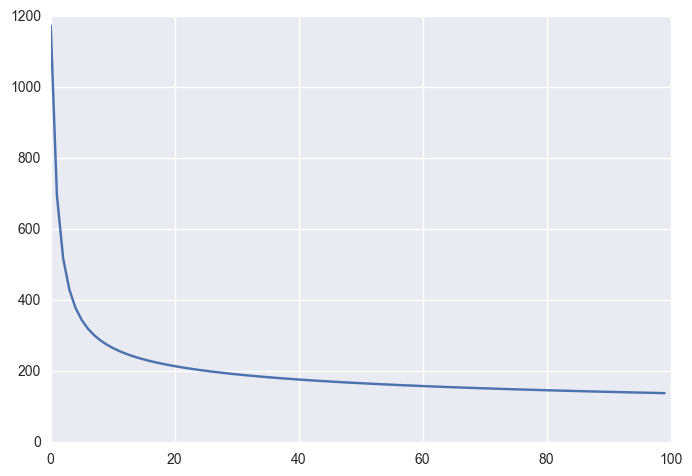

In [14]:
plt.plot(epoch_data['training_error'])

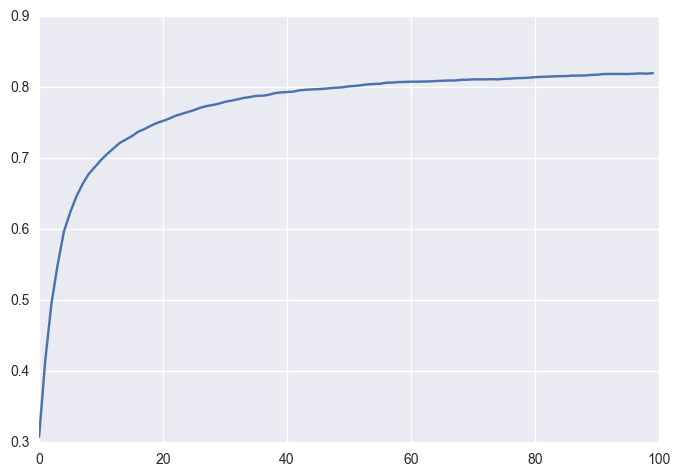

In [15]:
plt.plot(epoch_data['validation_acc'])

## Using Neural Network to predict Coronary Heart Disease

In [3]:
data = pd.read_csv('../../Dataset/heart.csv')
print data.shape

(462, 10)


In [4]:
data.head(2)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1


In [5]:
for col in data.columns:
    if data[col].dtype == 'object':
        data = pd.concat([data,pd.get_dummies(data[col])],axis=1)
        data.pop(col)
print data.shape

(462, 11)


In [6]:
data.head(2)

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,Absent,Present
0,160,12.00,5.73,23.11,49,25.30,97.20,52,1,0.0,1.0
1,144,0.01,4.41,28.61,55,28.87,2.06,63,1,1.0,0.0


In [7]:
label = data.pop('chd')
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,pd.get_dummies(label),test_size=0.3,random_state=7)
print X_train.shape,y_train.shape

(323, 10) (323, 2)


In [8]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [9]:
tf.reset_default_graph()

In [10]:
num_epochs = 100
num_hidden_layer = 256
n_training,num_features = X_train.shape
n_cv = X_test.shape[0]
batch_size = 128
num_classes = y_train.shape[1]

In [11]:
X = tf.placeholder(dtype=tf.float32,shape=[batch_size,num_features],name='X')
y = tf.placeholder(dtype=tf.float32,shape=[batch_size,num_classes],name='y')

In [12]:
W1 = tf.get_variable(name='W1',shape=[num_features,num_hidden_layer],initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.ones([1,num_hidden_layer]),name='b1')
W2 = tf.get_variable(name='W2',shape=[num_hidden_layer,num_classes],initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.ones([1,num_classes]),name='b2')

In [13]:
a1 = tf.nn.relu(tf.matmul(X,W1) + b1)
logits = tf.matmul(a1,W2) + b2
ypred = tf.arg_max(logits,1)

In [14]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits))
optimizer = tf.train.AdadeltaOptimizer(learning_rate=0.01).minimize(loss)

In [15]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter('./graphs',sess.graph)
    for epoch in range(num_epochs):
        epoch_loss,epoch_cv_acc = 0,[]
        for batch in iterate_minibatches(X_train,y_train,batch_size,shuffle=False):
            x_batch,y_batch = batch
            _,l = sess.run([optimizer,loss],feed_dict={X:x_batch,y:y_batch})
            epoch_loss += l
        for batch in iterate_minibatches(X_test,y_test,batch_size,shuffle=False):
            x_batch,y_batch = batch
            predictions = sess.run(ypred,feed_dict={X:x_batch,y:y_batch})
            epoch_cv_acc.append(np.mean(np.equal(predictions,np.argmax(y_batch))))
        print 'Epoch: {}\tTraining Loss: {}\tCV Accuracy: {}'.format(epoch+1,epoch_loss,np.mean(epoch_cv_acc))

Epoch: 1	Training Loss: 3.2473692894	CV Accuracy: 0.515625
Epoch: 2	Training Loss: 3.23972940445	CV Accuracy: 0.515625
Epoch: 3	Training Loss: 3.23294472694	CV Accuracy: 0.515625
Epoch: 4	Training Loss: 3.22640311718	CV Accuracy: 0.515625
Epoch: 5	Training Loss: 3.21997928619	CV Accuracy: 0.515625
Epoch: 6	Training Loss: 3.21362519264	CV Accuracy: 0.515625
Epoch: 7	Training Loss: 3.20731818676	CV Accuracy: 0.515625
Epoch: 8	Training Loss: 3.20103597641	CV Accuracy: 0.515625
Epoch: 9	Training Loss: 3.19477772713	CV Accuracy: 0.515625
Epoch: 10	Training Loss: 3.18853855133	CV Accuracy: 0.515625
Epoch: 11	Training Loss: 3.18231296539	CV Accuracy: 0.515625
Epoch: 12	Training Loss: 3.17609810829	CV Accuracy: 0.515625
Epoch: 13	Training Loss: 3.16988706589	CV Accuracy: 0.515625
Epoch: 14	Training Loss: 3.16369342804	CV Accuracy: 0.515625
Epoch: 15	Training Loss: 3.1575063467	CV Accuracy: 0.5234375
Epoch: 16	Training Loss: 3.15132772923	CV Accuracy: 0.5234375
Epoch: 17	Training Loss: 3.145147

In [18]:
writer.close()

### Don't Predict, Count!

In [4]:
import collections
import math
import os
import random
import zipfile

from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-builtin

In [11]:
from embeddings_data import *
filename = maybe_download('text8.zip', 31344016)
words = read_data('/Users/najeebkhan/Downloads/text8 (1).zip')

Found and verified text8.zip


In [23]:
text = [' '.join(words)]

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
cv = CountVectorizer(max_features=10000)

In [26]:
cmatrix = cv.fit_transform(text)

In [33]:
print cmatrix.shape

(1, 10000)


In [34]:
X = cmatrix.T * cmatrix
X.setdiag(0)

In [35]:
print X.shape

(10000, 10000)


In [38]:
input_mat = tf.Variable(initial_value=X.todense(),name="cooccurence",dtype=tf.float32)
S = tf.svd(input_mat,compute_uv=False)

In [40]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    s = sess.run(S)
    print s.shape

(10000,)


In [41]:
print s[0]

2.01833e+12
